In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from collections import deque

from sklearn.metrics import root_mean_squared_error as RMSE

import sys
import os

root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if root_dir not in sys.path:
    sys.path.append(root_dir)

from utils.data_loaders import cv_splits_loader
from utils.data_loaders import test_dataset_loader
from utils.plotter import plot_pred
from utils.evaluator import model_eval

from n2o_models.linear_models import ChainedAutoLinearRegression, MultiOutputLinearRegression, VectorAutoRegression


In [4]:
train_df, val_df = cv_splits_loader(split = 1)

In [6]:
train_df.columns

Index(['N2O', 'NH4', 'NO3', 'N2O_lag1', 'N2O_lag2', 'N2O_lag3', 'N2O_lag4',
       'N2O_lag5', 'N2O_lag6', 'N2O_lag7', 'N2O_lag8', 'N2O_lag9', 'N2O_lag10',
       'N2O_lag11', 'N2O_lag12', 'N2O_lag13', 'N2O_lag14', 'N2O_lag15',
       'N2O_lag16', 'N2O_lag17', 'N2O_lag18', 'N2O_lag19', 'N2O_lag20',
       'NH4_lag1', 'NH4_lag2', 'NH4_lag3', 'NH4_lag4', 'NH4_lag5', 'NH4_lag6',
       'NH4_lag7', 'NH4_lag8', 'NH4_lag9', 'NH4_lag10', 'NH4_lag11',
       'NH4_lag12', 'NH4_lag13', 'NH4_lag14', 'NH4_lag15', 'NH4_lag16',
       'NH4_lag17', 'NH4_lag18', 'NH4_lag19', 'NH4_lag20', 'NO3_lag1',
       'NO3_lag2', 'NO3_lag3', 'NO3_lag4', 'NO3_lag5', 'NO3_lag6', 'NO3_lag7',
       'NO3_lag8', 'NO3_lag9', 'NO3_lag10', 'NO3_lag11', 'NO3_lag12',
       'NO3_lag13', 'NO3_lag14', 'NO3_lag15', 'NO3_lag16', 'NO3_lag17',
       'NO3_lag18', 'NO3_lag19', 'NO3_lag20', 'N2O_lead1', 'N2O_lead2'],
      dtype='object')

In [8]:
train_df.head()

,N2O,NH4,NO3,N2O_lag1,N2O_lag2,N2O_lag3,N2O_lag4,N2O_lag5,N2O_lag6,N2O_lag7,...,NO3_lag13,NO3_lag14,NO3_lag15,NO3_lag16,NO3_lag17,NO3_lag18,NO3_lag19,NO3_lag20,N2O_lead1,N2O_lead2
time,,,,,,,,,,,,,,,,,,,,,
2022-06-12 02:20:00,0.459780,0.802299,1.563254,0.383073,0.268895,0.217766,0.163310,0.102662,0.037095,0.016088,...,1.418028,1.182717,0.912930,0.482552,0.123406,0.005908,0.018822,0.061391,0.532986,0.535417
2022-06-12 02:30:00,0.532986,1.036766,1.079640,0.459780,0.383073,0.268895,0.217766,0.163310,0.102662,0.037095,...,1.048384,1.418028,1.182717,0.912930,0.482552,0.123406,0.005908,0.018822,0.535417,0.449248
2022-06-12 02:40:00,0.535417,0.946469,0.694841,0.532986,0.459780,0.383073,0.268895,0.217766,0.163310,0.102662,...,0.496807,1.048384,1.418028,1.182717,0.912930,0.482552,0.123406,0.005908,0.449248,0.205990
2022-06-12 02:50:00,0.449248,1.065319,0.313555,0.535417,0.532986,0.459780,0.383073,0.268895,0.217766,0.163310,...,0.081347,0.496807,1.048384,1.418028,1.182717,0.912930,0.482552,0.123406,0.205990,0.006684
2022-06-12 03:00:00,0.205990,1.901509,0.048804,0.449248,0.535417,0.532986,0.459780,0.383073,0.268895,0.217766,...,0.005481,0.081347,0.496807,1.048384,1.418028,1.182717,0.912930,0.482552,0.006684,0.005411


## Auto Linear Regression

The predicted values of N2O concentration for the next 30 minutes are all equal to the last observed value. The following plot shows an example of a persistence model prediction.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


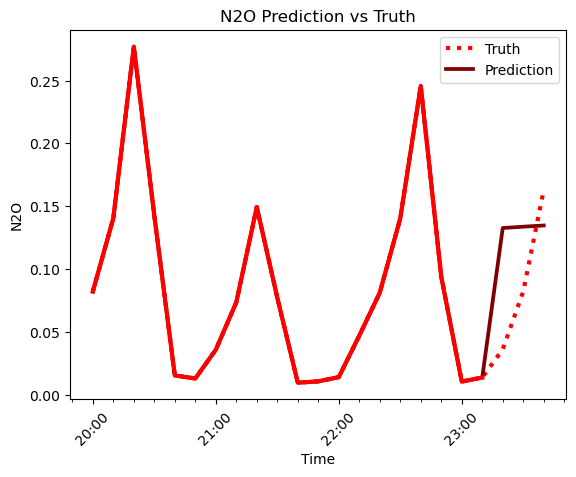

In [35]:
auto_lin = ChainedAutoLinearRegression(window_size = 20)
auto_lin.fit(train_df)
dp = val_df.iloc[[400]]

plot_pred(auto_lin, dp)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


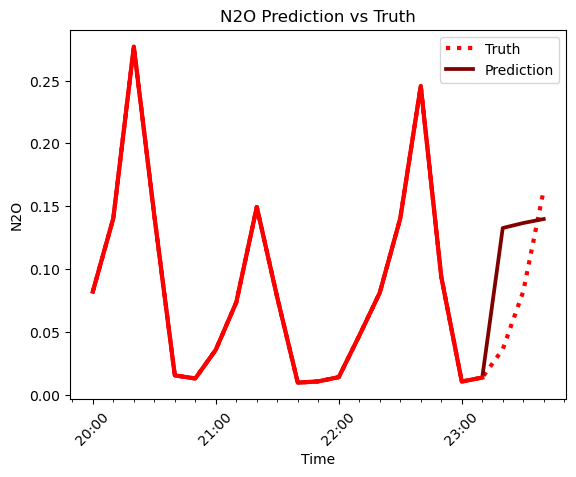

In [33]:
multi_lin = MultiOutputLinearRegression(window_size = 20)
multi_lin.fit(train_df)
dp = val_df.iloc[[400]]

plot_pred(multi_lin, dp)

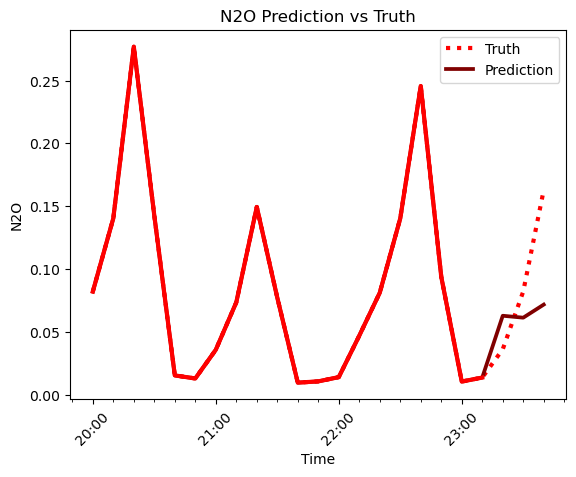

In [31]:
var = VectorAutoRegression(window_size = 4)
var.fit(train_df)
dp = val_df.iloc[[400]]

plot_pred(var, dp)